# Airline Analysis

The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?



## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [ ]:
max = np.round(flight['coach_price'].max(), 2)
min = np.round(flight['coach_price'].min(), 2)
mean = np.round(flight['coach_price'].mean(), 2)
median = np.round(flight['coach_price'].median(), 2)
sigma = np.round(flight['coach_price'].std(), 2)
mode = np.round(flight['coach_price'].mode(), 2)

max: 593.64
min: 44.42
mean: 376.59
median: 380.56
mode: 361.53
sigma: 67.74


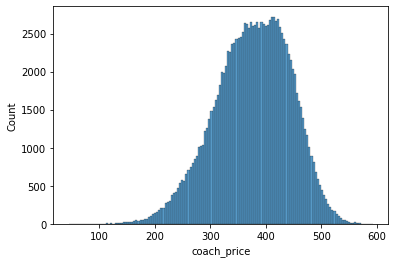

In [43]:
sns.histplot(flight['coach_price'])

In [46]:
print(f'max: {max}\nmin: {min}\nmean: {mean}\nmedian: {median}\nmode: {mode[0]}\nsigma: {sigma}')

max: 593.64
min: 44.42
mean: 376.59
median: 380.56
mode: 361.53
sigma: 67.74


The price of 500$ for a coach ticket seems a too high considering all flights. The price is located farther thatn 

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

In [ ]:
long_flight = flight[flight['hours']==8]['coach_price']
max_8_hr = np.round(long_flight.max(), 2)
min_8_hr = np.round(long_flight.min(), 2)
mean_8_hr = np.round(long_flight.mean(), 2)
median_8_hr = np.round(long_flight.median(), 2)
mode_8_hr = np.round(long_flight.mode(), 2)
std_8_hr = np.round(long_flight.std(), 2)

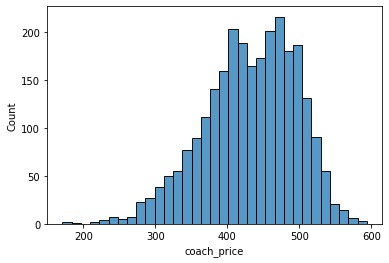

In [44]:
sns.histplot(flight[flight['hours'] == 8]['coach_price'])

In [45]:
print(f'max: {max_8_hr}\nmin: {min_8_hr}\nmean: {mean_8_hr}\nmedian: {median_8_hr}\nmode: {mode_8_hr[0]}\nstd: {std_8_hr}')

max: 593.64
min: 170.77
mean: 431.83
median: 437.12
mode: 489.82
std: 64.08


The price of 500USD for a coach ticket seems more reasonable for an 8-hours flight. It doesnt seem overpriced, since 500USD is located closer to the mean.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [47]:
delay = flight[flight['delay']<500]['delay']

In [48]:
d_mean = np.round(delay.mean(), 2)
d_median = np.round(delay.median(), 2)
d_mode = np.round(delay.mode(), 2)
d_std = np.round(delay.std(), 2)
print(f'mean: {d_mean}\nmedian: {d_median}\nmode:{d_mode[0]}\nstd:{d_std}')

mean: 12.02
median: 10.0
mode:10
std:7.79


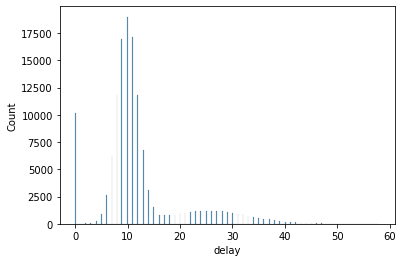

In [50]:
sns.histplot(delay)

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [ ]:
flight_sample = flight.sample(500)

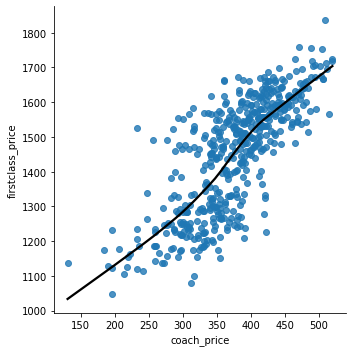

In [67]:
sns.lmplot(data=flight_sample, x='coach_price', y='firstclass_price', lowess=True, line_kws={'color': 'black'})

Flights with higher coach prices have higher first class prices.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [ ]:
flight_sample.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
118751,825,210,26,Yes,Yes,Yes,Friday,No,Yes,410.915,1554.09,2
66670,1325,202,12,Yes,Yes,Yes,Sunday,No,Yes,468.565,1545.20,2
32103,4266,214,10,Yes,Yes,No,Wednesday,No,No,378.510,1403.45,8
71380,1436,214,12,No,Yes,Yes,Sunday,No,Yes,408.390,1594.11,3
86931,1861,207,10,Yes,Yes,Yes,Saturday,No,Yes,448.935,1576.87,3


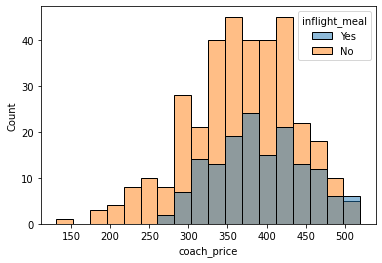

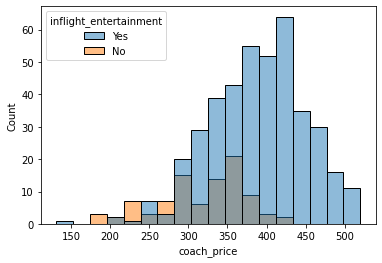

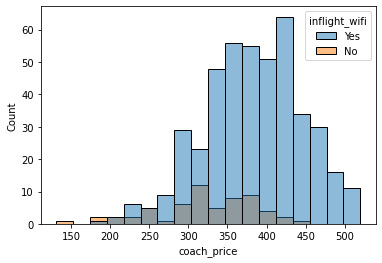

<Figure size 432x288 with 0 Axes>

In [57]:
sns.histplot(data=flight_sample, x='coach_price', hue='inflight_meal')
plt.show()
plt.clf()
sns.histplot(data=flight_sample, x='coach_price', hue='inflight_entertainment')
plt.show()
plt.clf()
sns.histplot(data=flight_sample, x='coach_price', hue='inflight_wifi')
plt.show()
plt.clf()

6. How does the number of passengers change in relation to the length of flights?

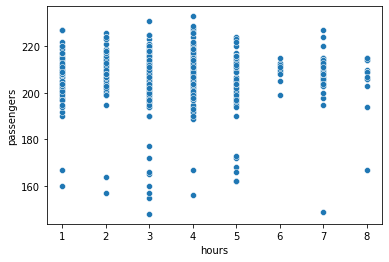

In [63]:
## Task 6
sns.scatterplot(data=flight_sample, x='hours', y='passengers', x_jitter = 0.25)


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

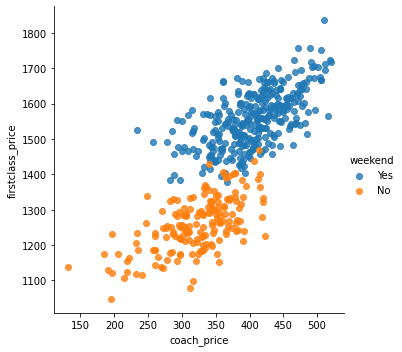

In [64]:
## Task 7
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sample, fit_reg=False)

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

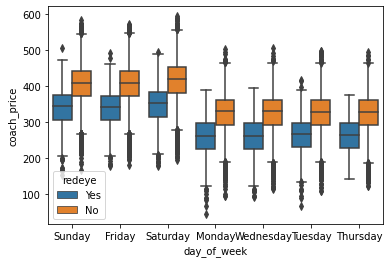

In [65]:
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)